In [122]:
import json
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional, Conv1D, MaxPooling1D, Input
from keras.initializers import Constant
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [56]:
rec = []
with open('ss.json', 'r') as f:
    for line in f:
        record = json.loads(line)
        rec.append(record)

In [57]:
X, y = [], []
for i in rec:
    X.append(i['prompt'])
    y.append(i['response'])

In [58]:
df = pd.DataFrame()
df['question'] = X
df['response'] = y

In [59]:
df.head()

,question,response
0,Delve into the intricate ways Histochemistry i...,"Histochemistry, the study of the chemical comp..."
1,How does Chemical engineering intersect with t...,Chemical engineering plays a significant role ...
2,What are the implications of Outline of paraps...,"The ""Outline of parapsychology"" is a scientifi..."
3,How does Phytopathology influence the developm...,"Phytopathology, the scientific study of plant ..."
4,Delve into the detailed ethical dilemmas posed...,The insurance industry has witnessed significa...


In [60]:
df.shape

(2984, 2)

In [61]:
b = range(0, 2984)
print(len(b))

2984


In [62]:
df['label'] = b

In [63]:
df.head()

,question,response,label
0,Delve into the intricate ways Histochemistry i...,"Histochemistry, the study of the chemical comp...",0
1,How does Chemical engineering intersect with t...,Chemical engineering plays a significant role ...,1
2,What are the implications of Outline of paraps...,"The ""Outline of parapsychology"" is a scientifi...",2
3,How does Phytopathology influence the developm...,"Phytopathology, the scientific study of plant ...",3
4,Delve into the detailed ethical dilemmas posed...,The insurance industry has witnessed significa...,4


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984 entries, 0 to 2983
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  2984 non-null   object
 1   response  2984 non-null   object
 2   label     2984 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 70.1+ KB


In [65]:
df.isnull().sum()

question    0
response    0
label       0
dtype: int64

In [66]:
df.duplicated().sum()

np.int64(0)

In [67]:
resp = dict()
for i in range(0, df.shape[0]):
    resp[df['label'][i]] = df['response'][i]

In [68]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['question'])
seq = tokenizer.texts_to_sequences(df['question'])

In [69]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

1671

In [70]:
maxlen = max([len(i) for i in seq])
maxlen

27

In [71]:
pad_seq = pad_sequences(seq, maxlen = maxlen, padding = 'post')

In [72]:
glove_file = open('glove.6B.100d.txt', encoding = 'utf-8')
embedding_matrix = dict()
for line in glove_file:
    record = line.split()
    word = record[0]
    vec = np.asarray(record[1: ], dtype = 'float32')
    embedding_matrix[word] = vec
glove_file.close()

In [73]:
embedding_vectors = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    vector = embedding_matrix.get(word)
    if vector is not None:
        embedding_vectors[index] = vector

In [74]:
y = df['label']

In [75]:
classes = df['label'].nunique()
print(classes)

2984


In [92]:
model = Sequential()

In [93]:
model.add(Embedding(vocab_size, 100, embeddings_initializer = Constant(embedding_vectors), trainable = False))
model.add(Conv1D(16, 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Bidirectional(LSTM(25)))
model.add(Dense(classes, activation = 'softmax'))

In [94]:
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [95]:
early_stopping = EarlyStopping(monitor = 'loss', patience = 7)

In [96]:
history = model.fit(pad_seq, y, epochs = 150, callbacks = [early_stopping])

Epoch 1/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.0000e+00 - loss: 8.0113
Epoch 2/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0017 - loss: 8.0123
Epoch 3/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 8.0147
Epoch 4/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 8.0056
Epoch 5/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0000e+00 - loss: 8.0006
Epoch 6/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0000e+00 - loss: 7.9870
Epoch 7/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 3.4468e-04 - loss: 7.8745
Epoch 8/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0049 - loss: 7.5899
Epoch 9/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0064 - loss: 7.2163
Epoch 10/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0303 - loss: 6.8179
Epoch 11/150
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0759 - loss: 6.4843
Epoch 12/150
94/94 ━━━━━━━━━

In [108]:
while True:
    text = input('You: ')
    if text == 'finish':
        break
    else:
        text_seq = tokenizer.texts_to_sequences([text])[0]
        pad_text = pad_sequences([text_seq], maxlen = maxlen, padding = 'post')
        print(resp[np.argmax(model.predict(pad_text))])
        print('===========================================================================')

You:  Delve into the intricate ways Histochemistry interacts with emerging technologies


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Histochemistry, the study of the chemical composition and distribution of cells, tissues, and organs, has undergone a significant transformation in recent years with the advent of emerging technologies. These technologies have facilitated the development of more sensitive, specific, and efficient histochemical techniques, enabling researchers to gain deeper insights into the biological processes that underlie diseases and other biological phenomena. In this article, we will delve into the intricate ways that histochemistry interacts with emerging technologies.

1. Digital Histopathology:

One of the most significant emerging technologies that has transformed histochemistry is digital histopathology. Digital histopathology refers to the process of converting histopathological slides into digital images that can be analyzed using computer software. This technology has several advantages, such as the ability to store and access large volumes of data, 

You:  Please describe the complex methods of interacting histochemistry with emerging technologies


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Television and global economic systems are interconnected in a complex relationship that has evolved over time. Television, as a mass media platform, plays a significant role in shaping cultural values, influencing consumer behavior, and promoting globalization. The following are some ways in which television studies and global economic systems are intertwined:

1. Globalization and Cultural Imperialism: Television has become a powerful tool for globalization, as it allows for the dissemination of cultural products and ideas across national borders. However, this process has also been criticized for promoting cultural imperialism, as Western media dominates the global market and imposes its values and ideologies on other cultures.

2. Advertising and Consumerism: Television is a major platform for advertising, and the commercialization of television content has contributed to the growth of consumerism. Television programs often promote consumer pro

You:  Histochemistry 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Automata theory, which is a branch of computer science and mathematics, intersects with several other fields, including:

1. Computer Science: Automata theory is a fundamental part of computer science, and it has applications in areas such as compilers, parsing, and language processing. It is also used in the design of computer hardware, such as finite state machines and sequential circuits.

2. Linguistics: Automata theory is used in linguistics to model the structure of natural languages. It is used to define grammars and to analyze the syntax and semantics of language.

3. Cryptography: Automata theory is used in cryptography to design secure encryption and decryption algorithms. It is also used in the analysis of cryptographic protocols and systems.

4. Biology: Automata theory is used in biology to model biological systems, such as gene regulatory networks and protein interaction networks. It is also used in the analysis of biological sequence

You:  What are the implications of Outline of parapsychology for international trade?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The "Outline of parapsychology" is a scientific research area that explores phenomena that are not currently explained by mainstream science, such as telepathy, psychokinesis, and near-death experiences. While this field of study is still in its early stages and is not widely accepted by the scientific community, it does not have any immediate implications for international trade. 

Trade is primarily driven by factors such as supply and demand, production costs, transportation, and tariffs. The study of parapsychology does not directly influence any of these factors. However, there are a few indirect implications that could potentially affect international trade:

1. Intellectual property: If parapsychological discoveries lead to new technologies or products, they may be protected by intellectual property laws. This could lead to international trade disputes over patent infringement, especially if the technology is developed in one country and the

You:  How does Phytopathology influence the development of virtual realities?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Phytopathology, the scientific study of plant diseases, does not directly influence the development of virtual realities. While virtual reality technologies can be used to simulate plant diseases and help researchers understand how plant diseases spread, the development of virtual realities is primarily driven by advances in computer graphics, virtual reality hardware, and software engineering. Phytopathology contributes to the development of virtual realities indirectly by providing scientific insights and data that can be used to create more realistic and accurate virtual environments for studying plant diseases. However, the impact of phytopathology on virtual reality development is limited compared to other fields such as computer science, engineering, and psychology.


You:  Delve into the intricate methods Histochemistry interacts with emerging technologies.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Histochemistry, the study of the chemical composition and distribution of cells, tissues, and organs, has undergone a significant transformation in recent years with the advent of emerging technologies. These technologies have facilitated the development of more sensitive, specific, and efficient histochemical techniques, enabling researchers to gain deeper insights into the biological processes that underlie diseases and other biological phenomena. In this article, we will delve into the intricate ways that histochemistry interacts with emerging technologies.

1. Digital Histopathology:

One of the most significant emerging technologies that has transformed histochemistry is digital histopathology. Digital histopathology refers to the process of converting histopathological slides into digital images that can be analyzed using computer software. This technology has several advantages, such as the ability to store and access large volumes of data, 

You:  Delve into the intricate ways Histochemistry interacts with emerging innovations.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Histochemistry, the study of the chemical composition and distribution of cells, tissues, and organs, has undergone a significant transformation in recent years with the advent of emerging technologies. These technologies have facilitated the development of more sensitive, specific, and efficient histochemical techniques, enabling researchers to gain deeper insights into the biological processes that underlie diseases and other biological phenomena. In this article, we will delve into the intricate ways that histochemistry interacts with emerging technologies.

1. Digital Histopathology:

One of the most significant emerging technologies that has transformed histochemistry is digital histopathology. Digital histopathology refers to the process of converting histopathological slides into digital images that can be analyzed using computer software. This technology has several advantages, such as the ability to store and access large volumes of data, 

You:  Delve into the intricate methods Histochemistry interacts with emerging innovation.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Histochemistry, the study of the chemical composition and distribution of cells, tissues, and organs, has undergone a significant transformation in recent years with the advent of emerging technologies. These technologies have facilitated the development of more sensitive, specific, and efficient histochemical techniques, enabling researchers to gain deeper insights into the biological processes that underlie diseases and other biological phenomena. In this article, we will delve into the intricate ways that histochemistry interacts with emerging technologies.

1. Digital Histopathology:

One of the most significant emerging technologies that has transformed histochemistry is digital histopathology. Digital histopathology refers to the process of converting histopathological slides into digital images that can be analyzed using computer software. This technology has several advantages, such as the ability to store and access large volumes of data, 

You:  finish


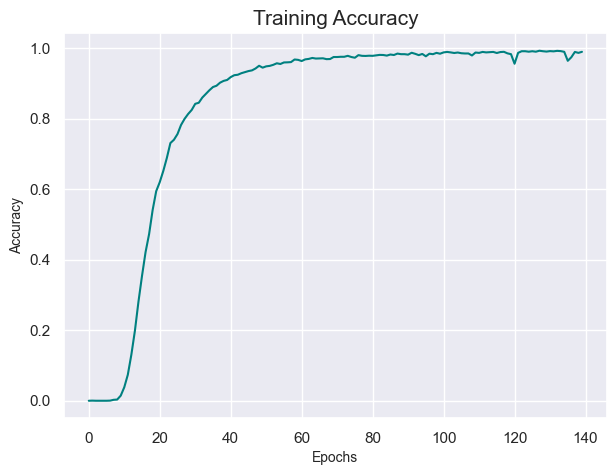

In [110]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['accuracy'], color = 'teal')
plt.title('Training Accuracy', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.show()

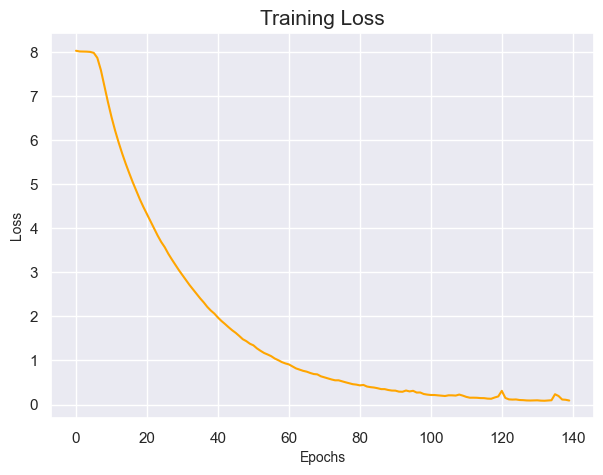

In [111]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['loss'], color = 'orange')
plt.title('Training Loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.show()

In [115]:
loss_max = max(history.history['loss'])
loss_history = [i / loss_max for i in history.history['loss']]
loss_history[: 10]

[1.0,
 0.9979883506578163,
 0.9978754901561289,
 0.9974775083870203,
 0.9967525875646023,
 0.9939652301742412,
 0.9799360758118442,
 0.9455252058486451,
 0.9002010223735847,
 0.8546058548939461]

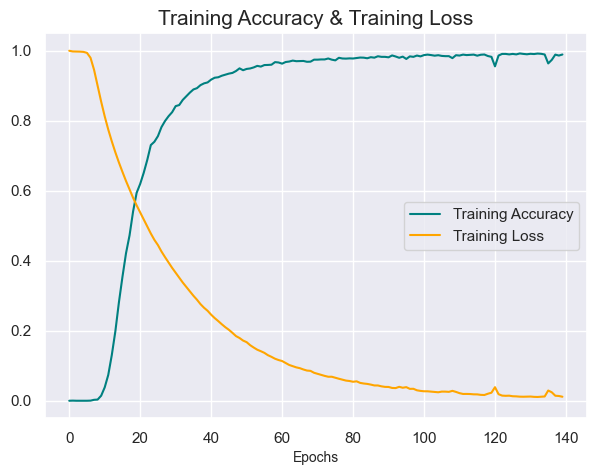

In [117]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(loss_history, label = 'Training Loss', color = 'orange')
plt.title('Training Accuracy & Training Loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.legend()
plt.show()